In [17]:
# Import libraries
import pandas as pd
import numpy as np
import openpyxl

In [18]:
print_db = pd.read_csv('printorders.csv')
ebook_db = pd.read_csv('ebookorders.csv')

In [19]:
print_db

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2018,316,656,584.0,518.0,418.0,237.0,360.0,469.0,339.0,264.0,300.0,121.0
1,2019,332,396,631.0,408.0,256.0,243.0,389.0,388.0,149.0,295.0,259.0,388.0
2,2020,550,549,324.0,297.0,261.0,187.0,269.0,421.0,283.0,44.0,232.0,49.0
3,2021,252,247,338.0,401.0,153.0,233.0,247.0,145.0,97.0,107.0,293.0,98.0
4,2022,93,281,163.0,111.0,160.0,337.0,173.0,64.0,122.0,81.0,150.0,99.0
5,2023,89,57,75.0,36.0,87.0,58.0,175.0,88.0,38.0,37.0,36.0,8.0
6,2024,40,38,81.0,20.0,42.0,28.0,60.0,32.0,58.0,201.0,15.0,11.0
7,2025,42,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ebook_db

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2018,171,153,220.0,144.0,241.0,167.0,213.0,251.0,279.0,268.0,346.0,128.0
1,2019,222,214,217.0,216.0,204.0,216.0,305.0,245.0,186.0,203.0,249.0,221.0
2,2020,260,227,261.0,299.0,233.0,328.0,416.0,282.0,339.0,25.0,180.0,70.0
3,2021,173,318,275.0,236.0,192.0,317.0,210.0,271.0,312.0,420.0,310.0,204.0
4,2022,225,320,215.0,95.0,124.0,174.0,135.0,119.0,129.0,140.0,203.0,179.0
5,2023,113,122,153.0,92.0,95.0,57.0,73.0,104.0,93.0,82.0,86.0,56.0
6,2024,63,91,75.0,51.0,55.0,47.0,113.0,78.0,101.0,186.0,45.0,49.0
7,2025,112,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print(print_db.columns)

Index(['year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')


In [22]:
print(ebook_db.columns)

Index(['year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')


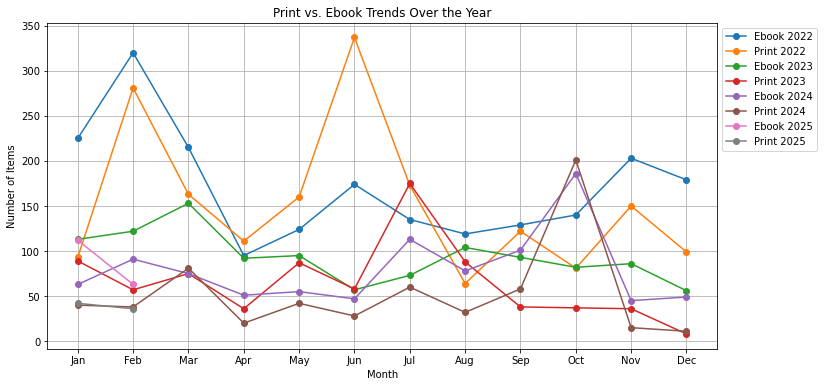

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Reshape data to long format
print_melted = print_db.melt(id_vars=['year'], var_name='month', value_name='count')
ebook_melted = ebook_db.melt(id_vars=['year'], var_name='month', value_name='count')

# Add a column to distinguish between Print and Ebook
print_melted['type'] = 'Print'
ebook_melted['type'] = 'Ebook'

# Combine both datasets
combined_df = pd.concat([print_melted, ebook_melted])

# Filter data to only include years 2022 and later
combined_df = combined_df[combined_df['year'] >= 2022]

# Drop any NaN values (just in case)
combined_df = combined_df.dropna(subset=['month', 'count'])

# Ensure 'month' is a string
combined_df['month'] = combined_df['month'].astype(str)

# Define month order for sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
combined_df['month'] = pd.Categorical(combined_df['month'], categories=month_order, ordered=True)

# Plot
plt.figure(figsize=(12, 6))

# Plot separate lines for each year and type
for (year, book_type), subset in combined_df.groupby(['year', 'type']):
    plt.plot(subset['month'].astype(str), subset['count'], label=f'{book_type} {year}', marker='o')

plt.xlabel('Month')
plt.ylabel('Number of Items')
plt.title('Print vs. Ebook Trends Over the Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True)
plt.show()



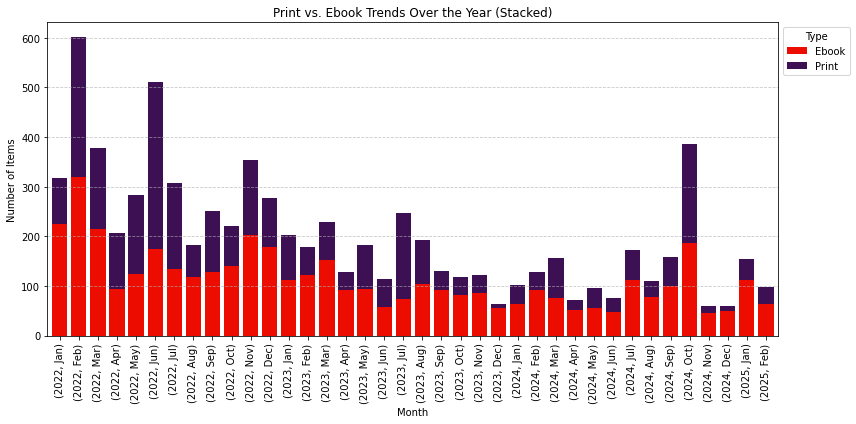

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Reshape data to long format
print_melted = print_db.melt(id_vars=['year'], var_name='month', value_name='count')
ebook_melted = ebook_db.melt(id_vars=['year'], var_name='month', value_name='count')

# Add a column to distinguish between Print and Ebook
print_melted['type'] = 'Print'
ebook_melted['type'] = 'Ebook'

# Combine both datasets
combined_df = pd.concat([print_melted, ebook_melted])

# Filter data to only include years 2022 and later
combined_df = combined_df[combined_df['year'] >= 2022]

# Drop any NaN values (just in case)
combined_df = combined_df.dropna(subset=['month', 'count'])

# Ensure 'month' is a string
combined_df['month'] = combined_df['month'].astype(str)

# Define month order for sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
combined_df['month'] = pd.Categorical(combined_df['month'], categories=month_order, ordered=True)

# Create a pivot table to sum counts by year, month, and type
pivot_df = combined_df.pivot_table(index=['year', 'month'], columns='type', values='count', aggfunc='sum', fill_value=0)

# Plot stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8, color=['#ed0c00', '#3c1053'])

plt.xlabel('Month')
plt.ylabel('Number of Items')
plt.title('Print vs. Ebook Trends Over the Year (Stacked)')
plt.legend(title='Type', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid clipping

# Save the plot as an image (e.g., PNG)
plt.savefig('trends_stacked_column.png', format='png')

# Display the plot
plt.show()


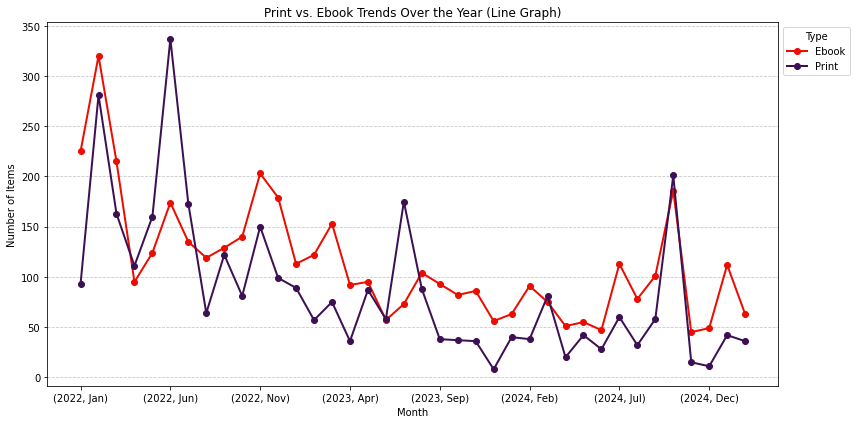

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Reshape data to long format
print_melted = print_db.melt(id_vars=['year'], var_name='month', value_name='count')
ebook_melted = ebook_db.melt(id_vars=['year'], var_name='month', value_name='count')

# Add a column to distinguish between Print and Ebook
print_melted['type'] = 'Print'
ebook_melted['type'] = 'Ebook'

# Combine both datasets
combined_df = pd.concat([print_melted, ebook_melted])

# Filter data to only include years 2022 and later
combined_df = combined_df[combined_df['year'] >= 2022]

# Drop any NaN values (just in case)
combined_df = combined_df.dropna(subset=['month', 'count'])

# Ensure 'month' is a string
combined_df['month'] = combined_df['month'].astype(str)

# Define month order for sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
combined_df['month'] = pd.Categorical(combined_df['month'], categories=month_order, ordered=True)

# Create a pivot table to sum counts by year, month, and type
pivot_df = combined_df.pivot_table(index=['year', 'month'], columns='type', values='count', aggfunc='sum', fill_value=0)

# Plot line chart with different colors for each type
pivot_df.plot(kind='line', figsize=(12, 6), marker='o', color=['#ed0c00', '#3c1053'], linewidth=2)

plt.xlabel('Month')
plt.ylabel('Number of Items')
plt.title('Print vs. Ebook Trends Over the Year (Line Graph)')
plt.legend(title='Type', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid clipping

# Save the plot as an image (e.g., PNG)
plt.savefig('trends_line_graph.png', format='png')

# Display the plot
plt.show()
